# Actividad 2

Suponga que está encargado de realizar el(los) indicador(es) de marginación aplicando la técnica de Análisis de Factores Comunes. A partir de los datos presentados en la base de datos proporcionada, responda los cuestionamientos que se indican.

  1. Mencione cuál es el objeto o individuo que se está analizando en el presente caso.

$\color{teal}{\text{El objeto de estudio es la entidad federativa.}}$

$\color{teal}{\text{Las variables son los porcentajes de la población que vive en alguna situación de marginación.}}$

  2. Identifica las variables que fueron medidas y, para cada una de ellas, mencionar el tipo de variables al que pertenece (cuantitativa o cualitativa) y la escala de medición empleada (categórica, ordinal, de razón, de intervalo).

$\color{teal}{\text{Todas las variables son cuantitativas continuas con escala de medición de razón.}}$

In [1]:
library(readxl)

marginacion <- read_excel("datasets/pobreza.xlsx", sheet="pobreza")

# Le ponemos el nombre del estado a cada observación.
# Esto sirve para cuando haga las gráficas, los individuos
# sean más fáciles de identificar
marginacion <- as.data.frame(marginacion)
rownames(marginacion)<-marginacion$`Entidad Federativa`

# Eliminamos la columna
marginacion$`Entidad Federativa` <- NULL

head(marginacion, n=5)
#dicc_clave[dicc_clave$clave=="A",] # Para filtrar
dicc_clave <- data.frame(
    clave=LETTERS[1:9],
    valor=c(
        "% Población de 15 años o más analfabeta",
        "% Población de 15 años o más sin primaria completa",
        "% Ocupantes en viviendas sin drenaje ni excusado",
        "% Ocupantes en viviendas sin energía eléctrica",
        "% Ocupantes en viviendas sin agua entubada",
        "% Viviendas con algún nivel de hacinamiento",
        "% Ocupantes en viviendas con piso de tierra",
        "% Población en localidades con menos de 5000 habitantes",
        "% Población ocupada con ingresos de hasta 2 salarios mínimos"
    )
)

,A,B,C,D,E,F,G,H,I
Aguascalientes,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60
Baja California,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85
Baja California Sur,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.64,22.37
Campeche,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69
Coahulia de Zaragoza,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94


  3. ¿Los datos utilizados para el presente estudio son adecuados para realizar el Análisis Factorial? justificar la decisión tomada.

In [2]:
cor_marginacion <- cor(marginacion)
cor_marginacion

,A,B,C,D,E,F,G,H,I
A,1.0000000,0.9450281,0.5486208,0.6247657,0.8245441,0.7848772,0.8900595,0.7915577,0.8149328
B,0.9450281,1.0000000,0.5193823,0.6240026,0.7628646,0.7216551,0.8279469,0.7899866,0.8314997
C,0.5486208,0.5193823,1.0000000,0.4641169,0.3735529,0.5477190,0.4686395,0.4357832,0.4846212
D,0.6247657,0.6240026,0.4641169,1.0000000,0.6479079,0.5064774,0.7289658,0.5581204,0.5256125
E,0.8245441,0.7628646,0.3735529,0.6479079,1.0000000,0.6593796,0.8819914,0.6992020,0.6070533
F,0.7848772,0.7216551,0.5477190,0.5064774,0.6593796,1.0000000,0.7058465,0.5517101,0.6756780
G,0.8900595,0.8279469,0.4686395,0.7289658,0.8819914,0.7058465,1.0000000,0.6635604,0.6594581
H,0.7915577,0.7899866,0.4357832,0.5581204,0.6992020,0.5517101,0.6635604,1.0000000,0.7629640
I,0.8149328,0.8314997,0.4846212,0.5256125,0.6070533,0.6756780,0.6594581,0.7629640,1.0000000


In [3]:
det(cor_marginacion)

[1] 3.486077e-05

In [4]:
library(psych)
num_obs <- nrow(marginacion)
cortest.bartlett(cor_marginacion, n=num_obs)$p.value

[1] 2.562095e-39

$\color{teal}{\text{Se ve que las correlaciones son altas y la determinante de la matriz es baja, por lo tanto se puede hacer el AF.}}$

$\color{teal}{\text{Haciendo la prueba de Bartlett, se obtiene que α es muy pequeño (debajo de .05) y es conveniente realizar el AF.}}$

  4. Utilizando el método de máxima verosimilitud, determinar el número de factores o variables latentes a ser considerados en el estudio. Justifique su respuesta

In [5]:
library(psych)
kmo_marginacion <- KMO(marginacion)
kmo_marginacion$MSA

[1] 0.8860702

$\color{teal}{\text{Obtenemos un índice KMO bastante alto, y verificando cada uno de los MSA:}}$

In [6]:
kmo_marginacion$MSAi

A         B         C         D         E         F         G         H 
0.8434946 0.9023701 0.9104169 0.8727158 0.8942835 0.9204968 0.8468889 0.8893295 
        I 
0.9329224

$\color{teal}{\text{Si nos quisiéramos aventurar a eliminar la variable con menor MSA, que en este caso es A, tendríamos:}}$

In [7]:
KMO(marginacion[,2:ncol(marginacion)])$MSA

[1] 0.8751531

$\color{teal}{\text{Vemos que el índice empeora. Por tanto mantenemos todas las variables para el análisis.}}$

In [8]:
num_vars=ncol(marginacion)
fa_marginacion <- fa(
    marginacion
    ,nfactors=num_vars    
    ,rotate="varimax"
    ,fm="mle"
    ,max.iter=256
)
fa_marginacion$Vaccounted[,1:6] # Después del 6 se sale del margen :(
fa_marginacion$Vaccounted[,7:9]
#fa.diagram(fa_marginacion)

,ML2,ML1,ML3,ML4,ML5,ML9
SS loadings,2.5258586,2.3877154,1.5702612,0.51729494,0.038847055,5.373562e-32
Proportion Var,0.2806510,0.2653017,0.1744735,0.05747722,0.004316339,5.970625e-33
Cumulative Var,0.2806510,0.5459527,0.7204261,0.77790335,0.782219687,7.822197e-01
Proportion Explained,0.3587879,0.3391652,0.2230492,0.07347963,0.005518065,7.632925e-33
Cumulative Proportion,0.3587879,0.6979531,0.9210023,0.99448193,1.000000000,1.000000e+00


,ML6,ML8,ML7
SS loadings,1.076377e-61,5.565707e-62,5.213223e-62
Proportion Var,1.195974e-62,6.184119e-63,5.792470e-63
Cumulative Var,7.822197e-01,7.822197e-01,7.822197e-01
Proportion Explained,1.528949e-62,7.905859e-63,7.405170e-63
Cumulative Proportion,1.000000e+00,1.000000e+00,1.000000e+00


$\color{teal}{\text{Viendo la proporcion acumulada, vemos que sólo necesitamos 3 factores para el análisis, porque 
con los tres}}$
$\color{teal}{\text{primeros tenemos una explicación del 90\%. Además, la proporción explicada de los factores 4-9 es muy baja.}}$

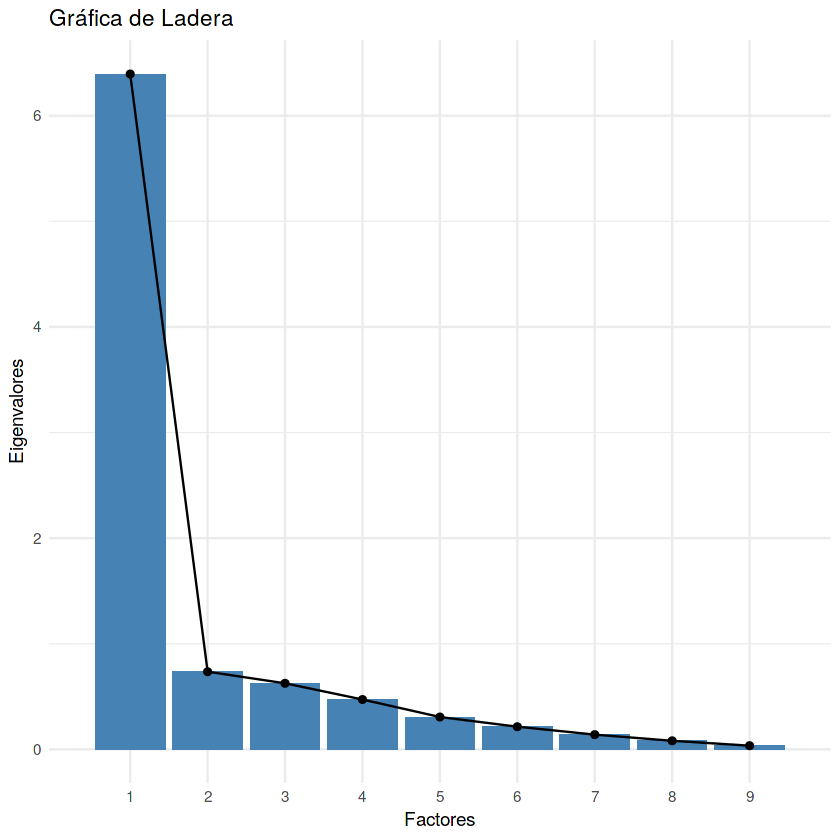

In [9]:
suppressMessages(library(ggplot2))

eigenvalor <- eigen(cor_marginacion)

df_cor_marg <- as.data.frame(eigenvalor)
df_cor_marg$x_pos <- 1:length(df_cor_marg$values)

ggplot(df_cor_marg, aes(y=values, x=df_cor_marg$x_pos)) +
    scale_x_discrete(limits=df_cor_marg$x_pos, position = "bottom") +
    geom_bar(stat="identity", fill="#4682B4") +
    geom_line(color="#000000")+
    geom_point()+    
    theme_minimal()+
    labs(
        title = "Gráfica de Ladera"
        ,x = "Factores"
        ,y = "Eigenvalores"
    )   

$\color{teal}{\text{En el gráfico de ladera vemos que sólo el primer componente sería válido si estuviéramos haciendo PCA}}$

$\color{teal}{\text{con el criterio de Kaiser.}}$

  5. Suponga que solo quiere emplear un único factor, responda a las siguientes preguntas:  
    - ¿Cuáles son los valores de las comunalidades para cada una de las variables consideradas en el estudio?

In [10]:
fa_marg_1 <- fa(
    marginacion
    ,nfactors=1
    ,rotate="varimax"
    ,fm="mle"
    ,max.iter=256
)

com_marginacion <- as.data.frame(fa_marg_1$communality)
colnames(com_marginacion) <- c("valor_comunalidad")
rownames(com_marginacion)<-dicc_clave[,2]

com_marginacion

,valor_comunalidad
% Población de 15 años o más analfabeta,0.9790660
% Población de 15 años o más sin primaria completa,0.9077043
% Ocupantes en viviendas sin drenaje ni excusado,0.3061094
% Ocupantes en viviendas sin energía eléctrica,0.4274867
% Ocupantes en viviendas sin agua entubada,0.6995404
% Viviendas con algún nivel de hacinamiento,0.6185704
% Ocupantes en viviendas con piso de tierra,0.8048108
% Población en localidades con menos de 5000 habitantes,0.6461571
% Población ocupada con ingresos de hasta 2 salarios mínimos,0.6828491


- ¿Cuáles son los dos índices que están más relacionados con la nueva variable o factor? Justifique su respuesta.

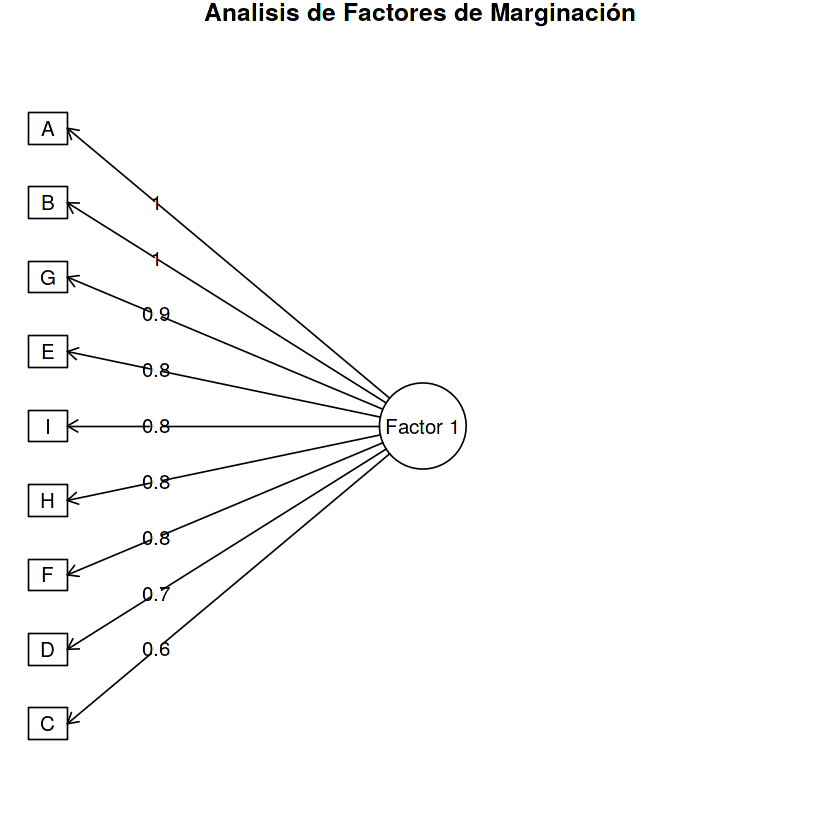

In [11]:
# Le cambiamos el nombre, para que sea más descriptivo
colnames(fa_marg_1$loadings) <- c("Factor 1") 
# Usando la función diagram para ver las cargas
fa.diagram(fa_marg_1, main="Analisis de Factores de Marginación")

$\color{teal}{\text{En el diagrama anterior vemos que las dos variables con más carga hacia el Factor 1, son A y B.}}$
$\color{teal}{\text{También podemos ver que la variable G está muy cerca de A y B}}$

- ¿Qué nombre debe otorgarse a la variable latente para que el público en general comprenda lo que representa?

$\color{teal}{\text{Marginación Social}}$

  6. A partir del modelo generado y el análisis de los resultados responda las siguientes interrogantes: 

In [12]:
# Extraemos las variables con mayor carga y las ordenamos. 
marginacion[with(marginacion, order(A, B)),c("A", "B"), drop=FALSE]
# drop=FALSE es para que no quite los nombres

,A,B
Cuidad de México,1.49,6.62
Nuevo Leon,1.64,8.38
Baja California,1.96,10.46
Coahulia de Zaragoza,1.99,9.56
Sonora,2.19,11.15
Baja California Sur,2.51,11.59
Aguascalientes,2.60,11.89
Chihuahua,2.67,12.65
Tamaulipas,3.03,13.35
Durango,3.17,14.50


- ¿Se comprueba que Nuevo León, CDMX y Sonora son entidades con menor marginación y que Chiapas, Guerrero y Oaxaca tienen una alta marginación?

$\color{teal}{\text{En el caso de Oaxaca, Guerrero y Chiapas se ve que sí tienen la más alta marginación}}$

$\color{teal}{\text{En el caso de los estados con menor marginación son Ciudad de México y Nuevo León; pero el tercer estado es}}$

$\color{teal}{\text{Baja California, no Sonora.}}$

- Si el estado de Tabasco quisiera mejorar su posición, a partir de este análisis ¿qué medida(s) deberá implementar?

$\color{teal}{\text{Implementar programas para aumentar la educación primaria y alfabetización.}}$